# Testing Image Preprocessing Pipeline

In [1]:
from image_preprocessing import NormalizeImageChannels, ZScoreNorm, BackgroundSubtraction, FlatFieldCorrection, SelectActiveChannel, TileImages, SplitZImageStack, PreprocessImage, PreprocessSplitImages
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import time

Using a sample z-stack (60x_z001.nd2), not final dataset

(4, 2304, 2304)


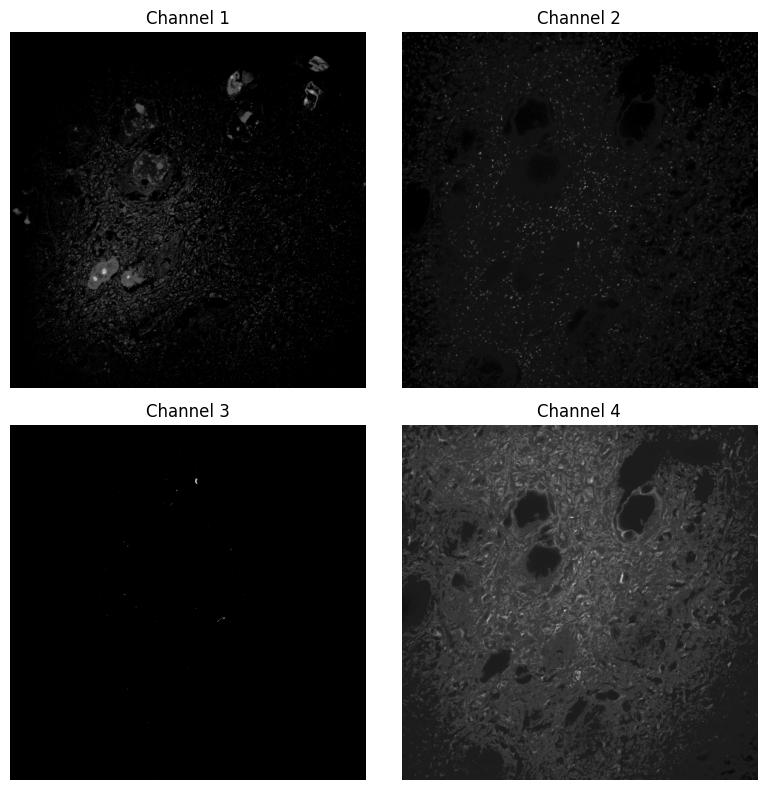

In [8]:
# load tif and view
tif_path = "images/processed_zstack/60x_z001_20.tif"
im = Image.open(tif_path).convert("RGBA")
im_array = np.array(im)
im_array = np.moveaxis(im_array, -1, 0)
print(im_array.shape)

# look at one of the tif files - verify if saved right
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.ravel()  # Flatten to easily iterate

# Plot each channel
for i in range(4):
    ax = axes[i]
    ax.imshow(im_array[i, :, :], cmap='gray')
    ax.set_title(f'Channel {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

(4, 2304, 2304)
Channel 0: Corrected (range=1.00)


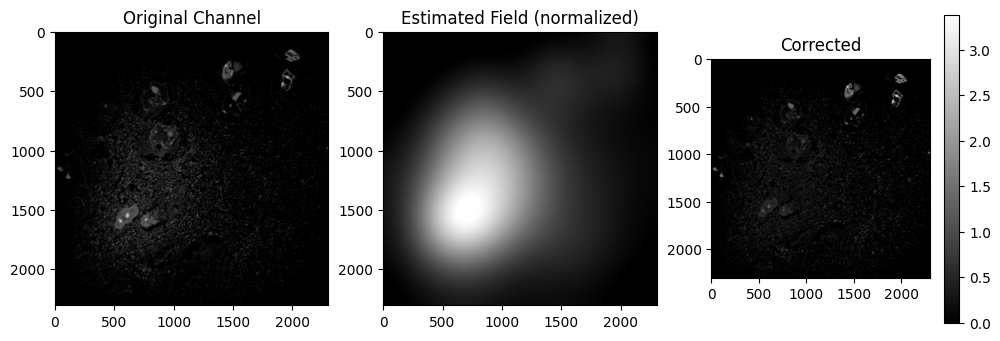

Channel 1: Corrected (range=3.00)


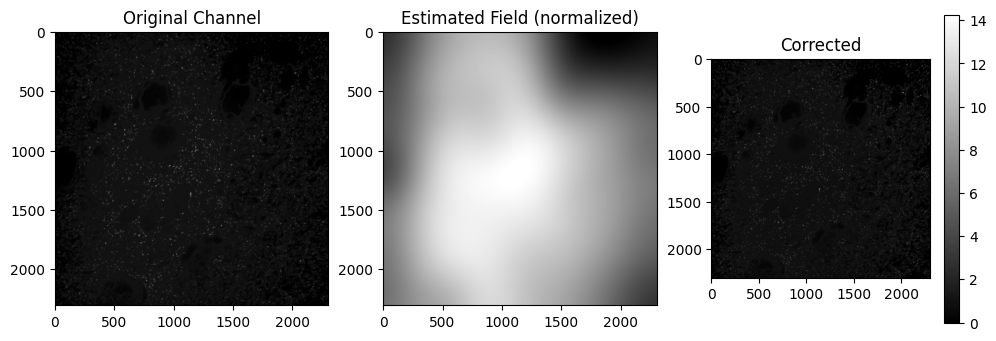

Channel 2: Skipped (range=0.00, mean=0.00)
Channel 3: Corrected (range=3.00)


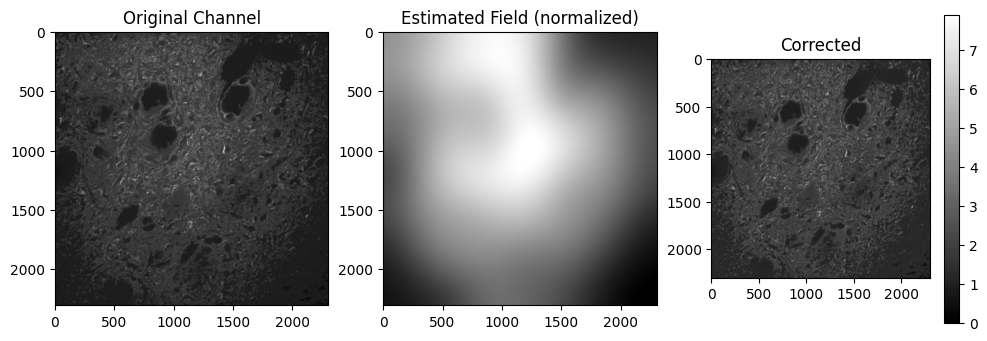

In [9]:
print(im_array.shape)
processed = PreprocessImage(im_array, plot=True)

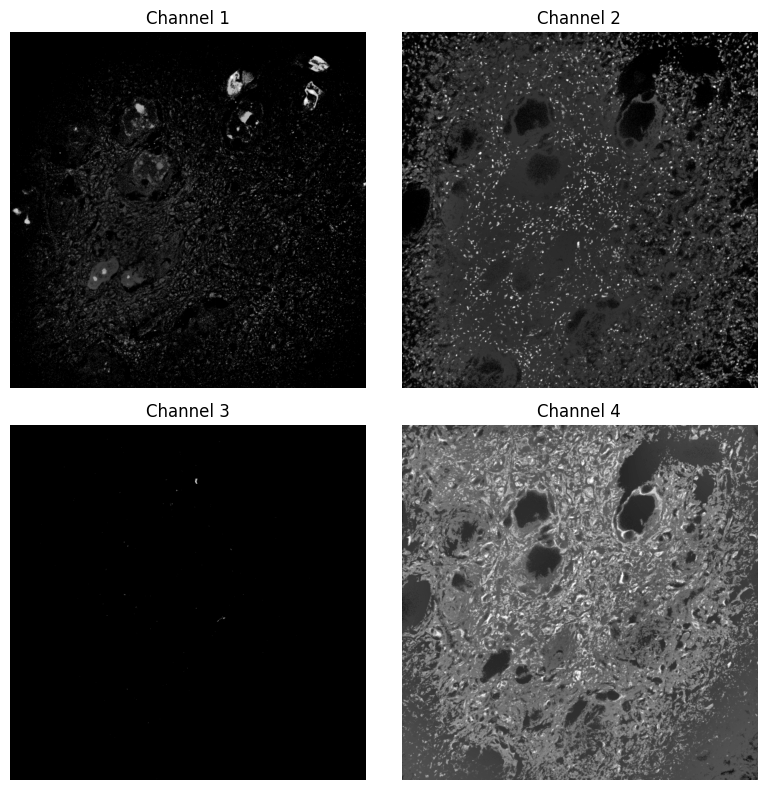

In [11]:
# look at one of the tif files - verify if saved right
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.ravel()  # Flatten to easily iterate

# Plot each channel
for i in range(4):
    ax = axes[i]
    ax.imshow(processed[i, :, :,], cmap='gray')
    ax.set_title(f'Channel {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

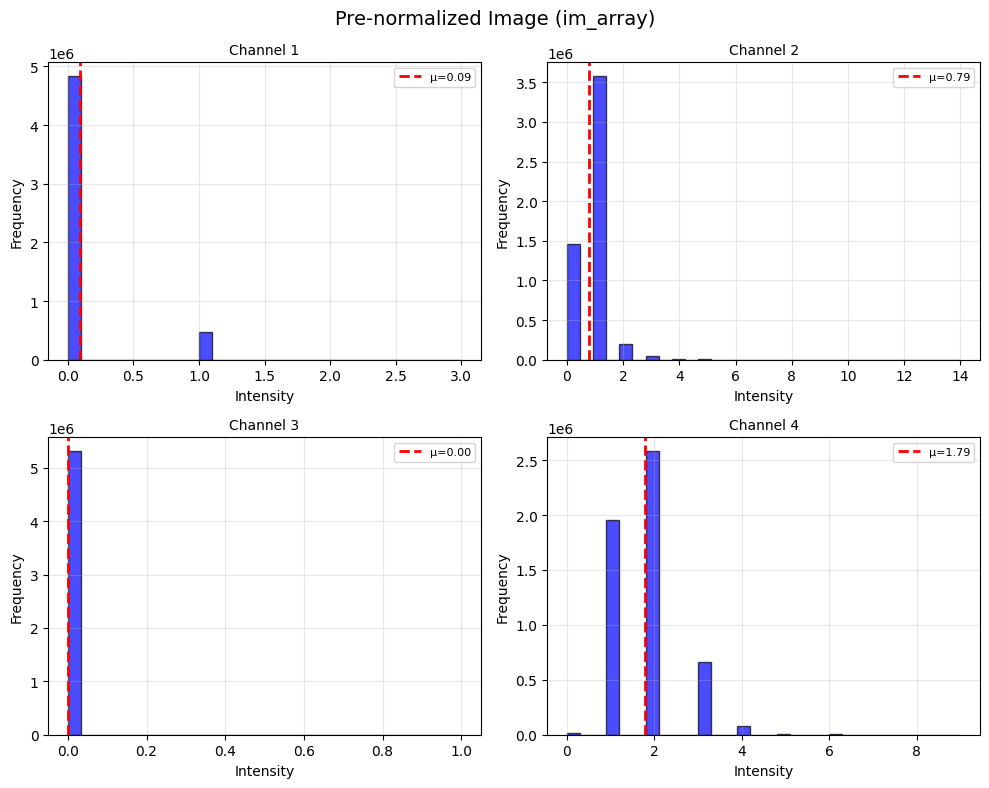

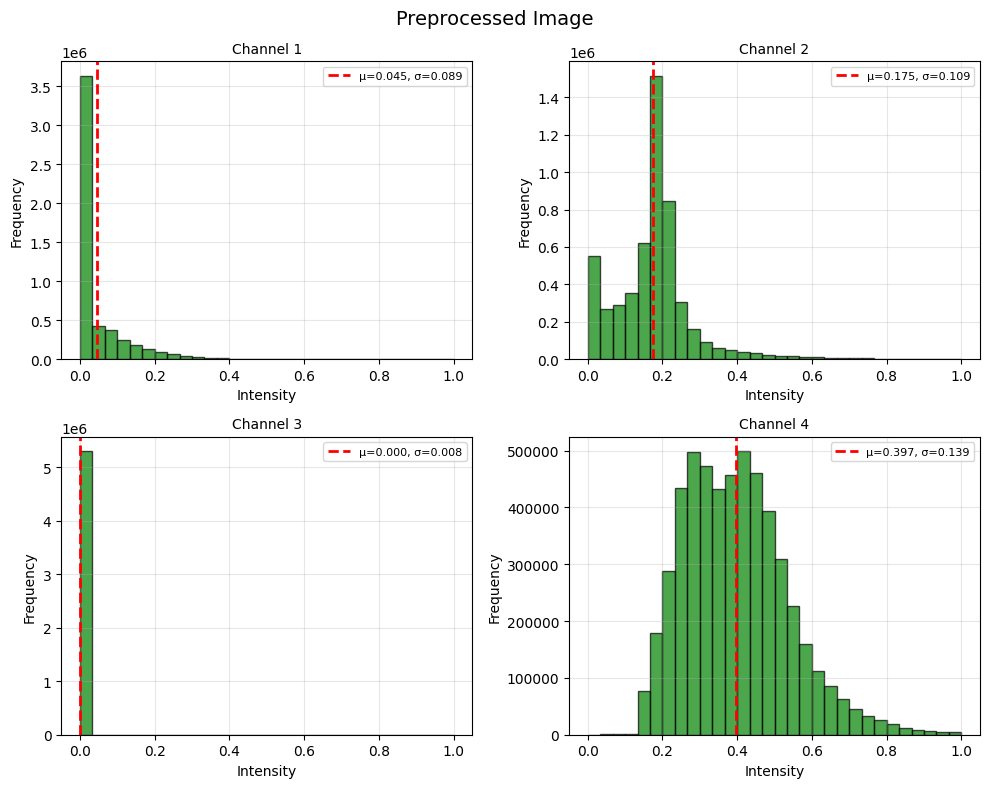

In [13]:
# Plot im_array (pre-normalized)
fig1, axes1 = plt.subplots(2, 2, figsize=(10, 8))
fig1.suptitle('Pre-normalized Image (im_array)', fontsize=14)

for i in range(4):
    row = i // 2
    col = i % 2
    channel_data = im_array[i].flatten()
    
    axes1[row, col].hist(channel_data, bins=30, color='blue', alpha=0.7, edgecolor='black')
    axes1[row, col].set_title(f'Channel {i+1}', fontsize=10)
    axes1[row, col].set_xlabel('Intensity')
    axes1[row, col].set_ylabel('Frequency')
    axes1[row, col].grid(True, alpha=0.3)
    
    mean_val = np.mean(channel_data)
    axes1[row, col].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                           label=f'μ={mean_val:.2f}')
    axes1[row, col].legend(fontsize=8)

plt.tight_layout()
plt.show()

# Plot processed (z-score normalized)
fig2, axes2 = plt.subplots(2, 2, figsize=(10, 8))
fig2.suptitle('Preprocessed Image', fontsize=14)

for i in range(4):
    row = i // 2
    col = i % 2
    channel_data = processed[i].flatten()
    
    axes2[row, col].hist(channel_data, bins=30, color='green', alpha=0.7, edgecolor='black')
    axes2[row, col].set_title(f'Channel {i+1}', fontsize=10)
    axes2[row, col].set_xlabel('Intensity')
    axes2[row, col].set_ylabel('Frequency')
    axes2[row, col].grid(True, alpha=0.3)
    
    mean_val = np.mean(channel_data)
    std_val = np.std(channel_data)
    axes2[row, col].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                           label=f'μ={mean_val:.3f}, σ={std_val:.3f}')
    axes2[row, col].legend(fontsize=8)

plt.tight_layout()
plt.show()